In [595]:
%matplotlib inline

import glob
import matplotlib.pyplot as plt
import random

import importlib
import dicom_utils

importlib.reload(dicom_utils)
from dicom_utils import DicomUtils

DATA_PATH='/home/sravya/data/DicomSegmentation/final_data/'
CONTOUR_PATH=DATA_PATH+ 'contourfiles/'

# Preprocess

In [596]:
#Create DicomUtils object
du = DicomUtils(DATA_PATH)

# Visualize i-contours and o-contours

In [586]:
ocfiles = du.get_ocfiles()

In [587]:
dicom_arr, imask, ipolygon, omask, opolygon = du.get_dicom_and_mask(random_ocfiles[0])

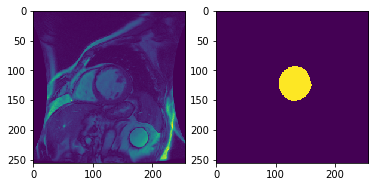

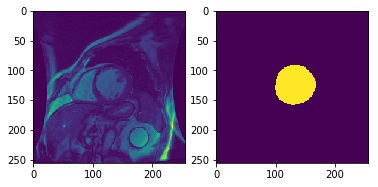

(None, None)

In [588]:
du.visualize_sidebyside(dicom_arr, imask), du.visualize_sidebyside(dicom_arr, omask)

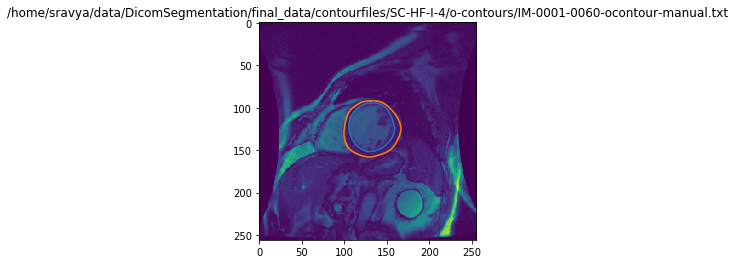

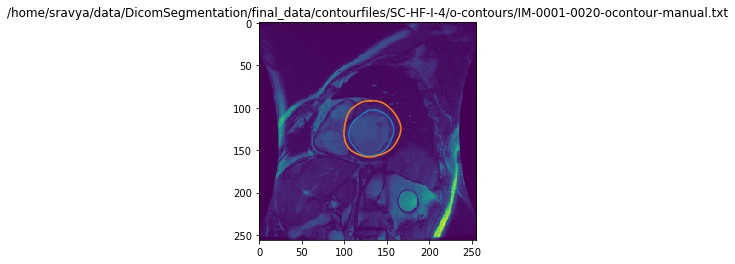

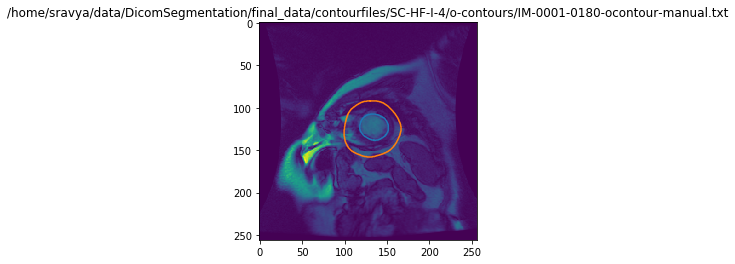

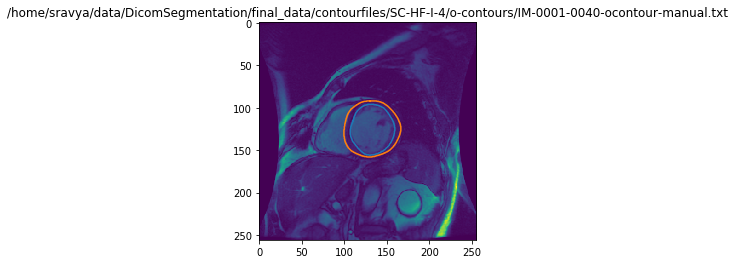

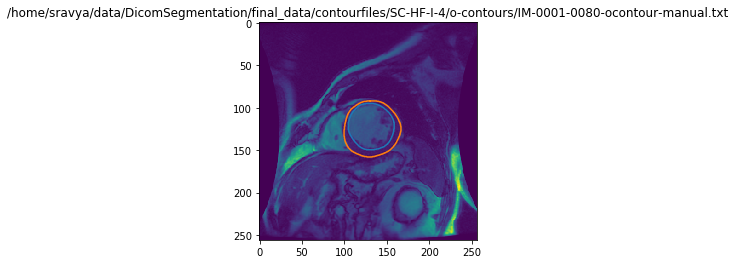

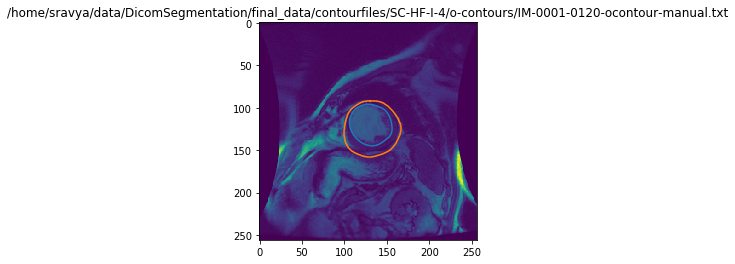

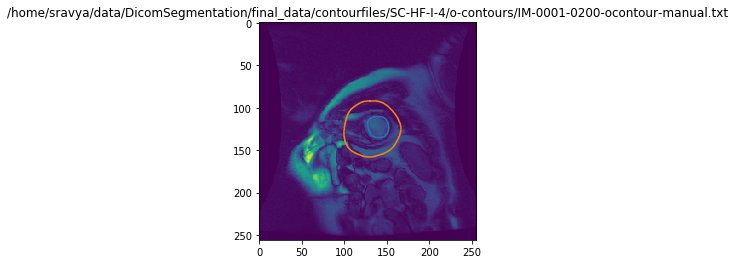

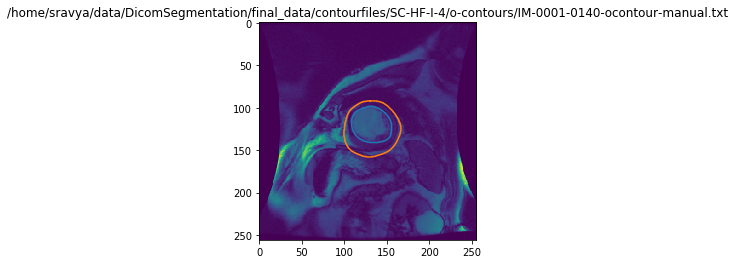

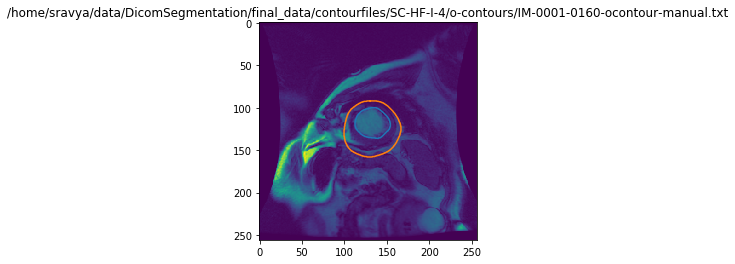

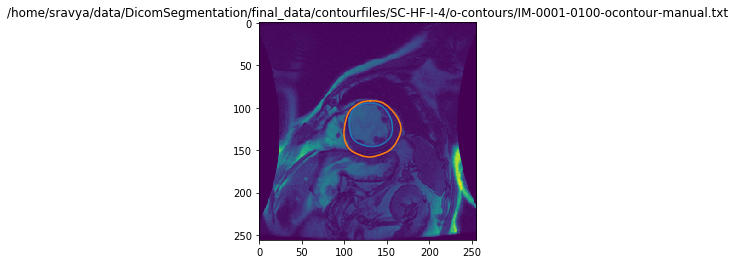

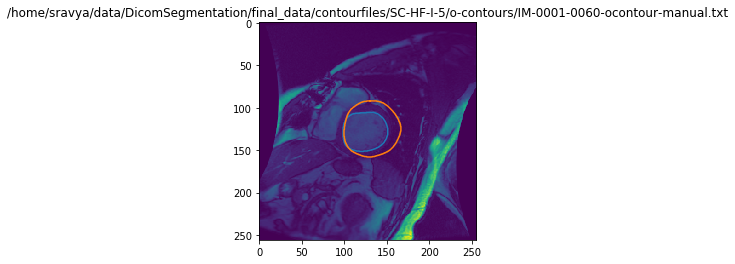

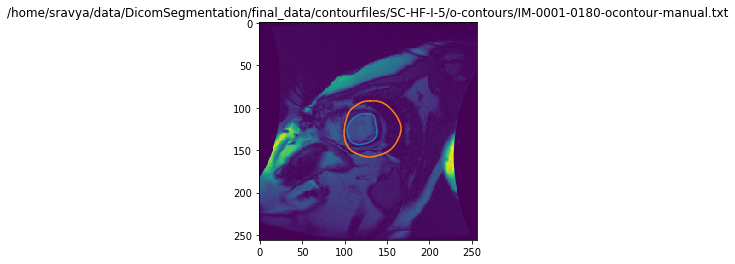

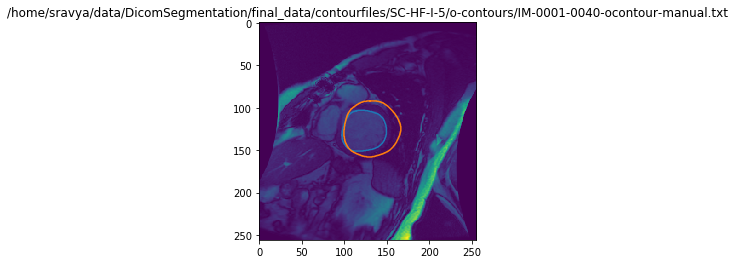

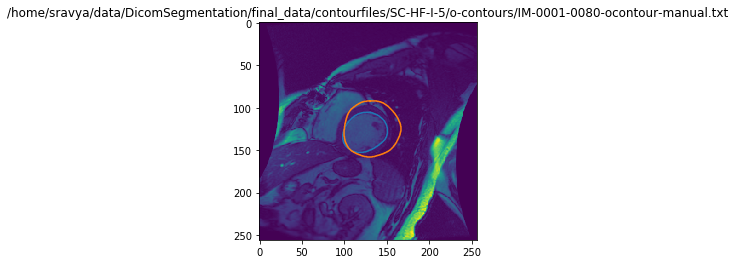

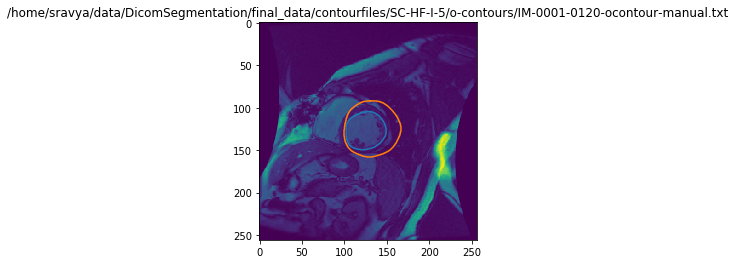

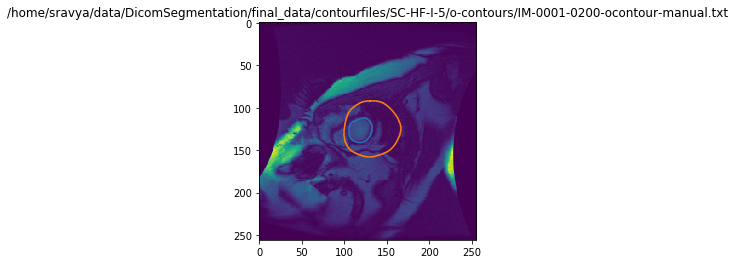

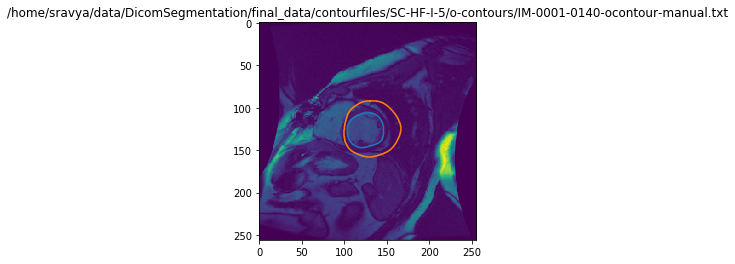

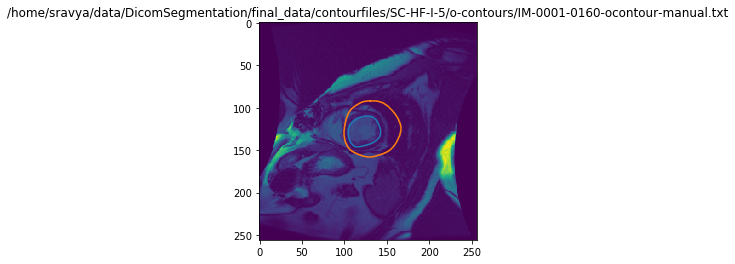

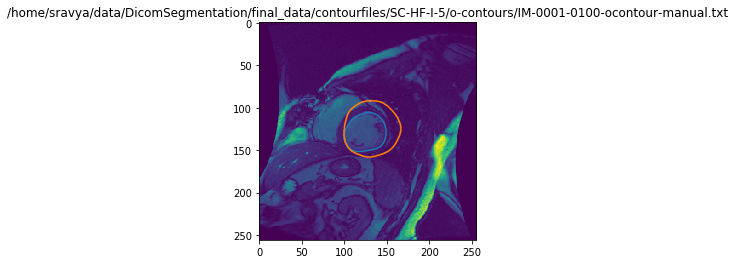

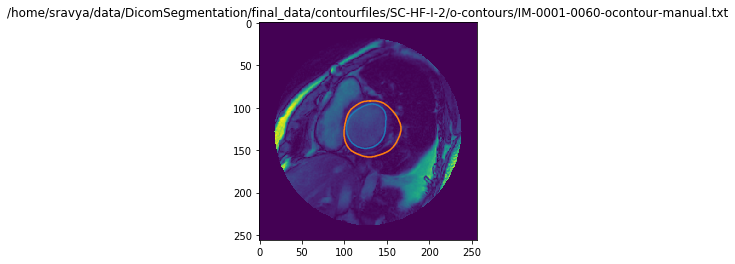

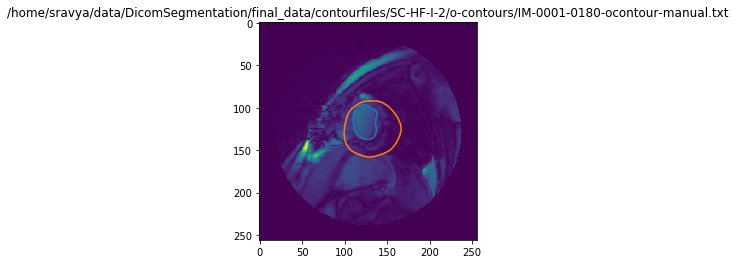

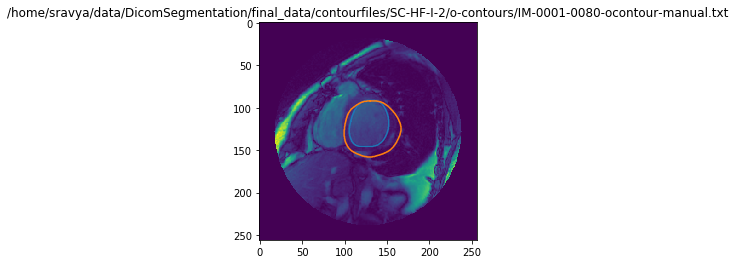

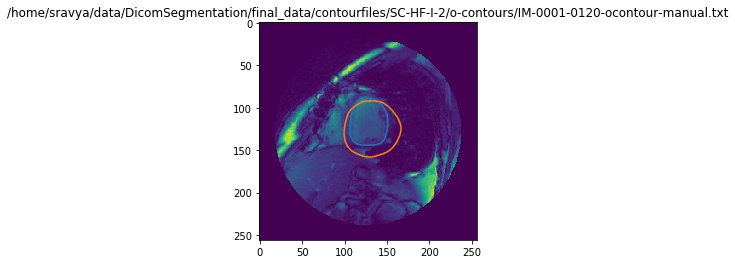

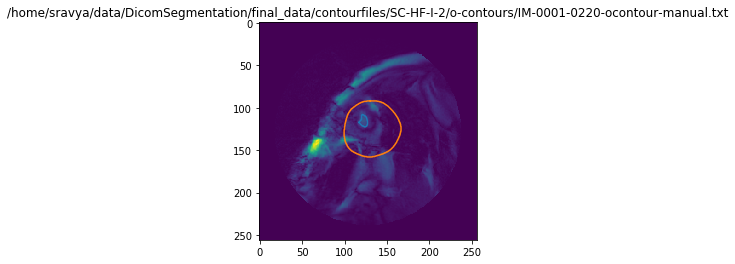

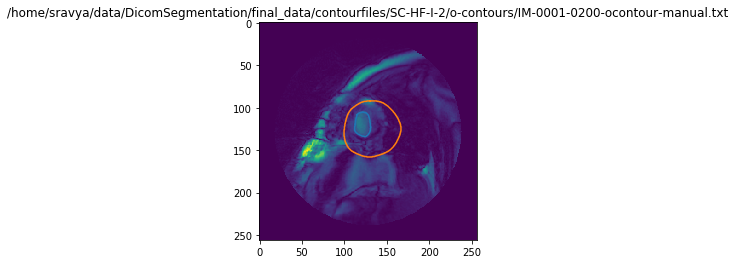

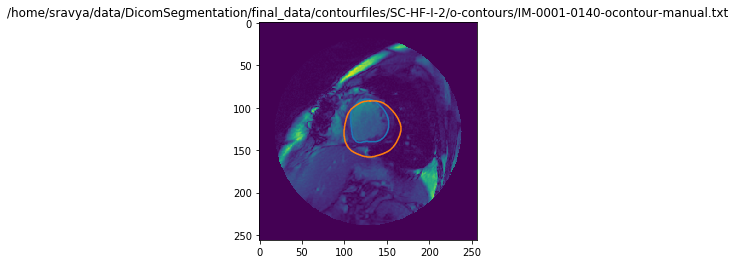

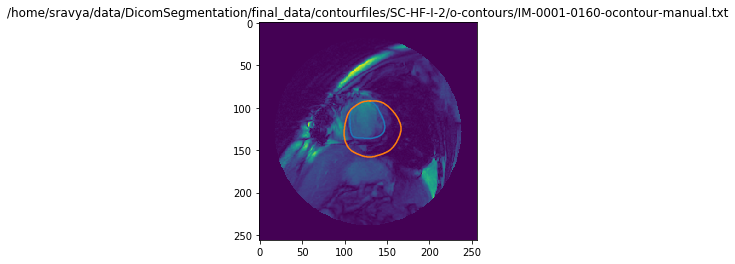

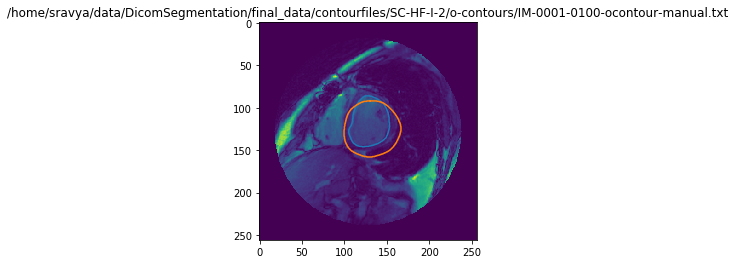

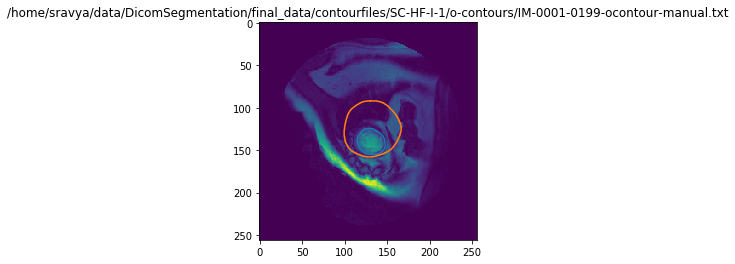

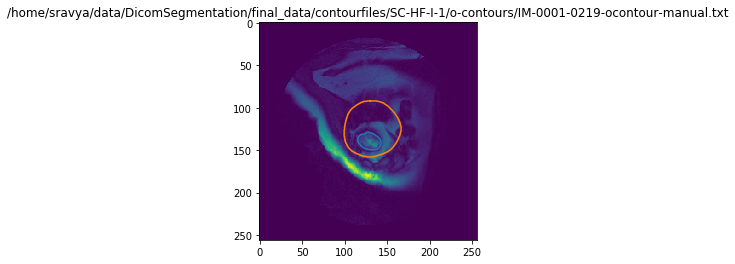

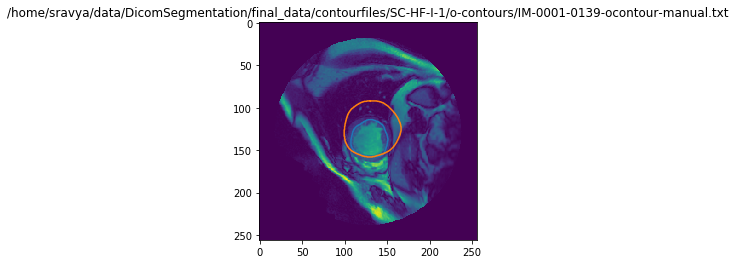

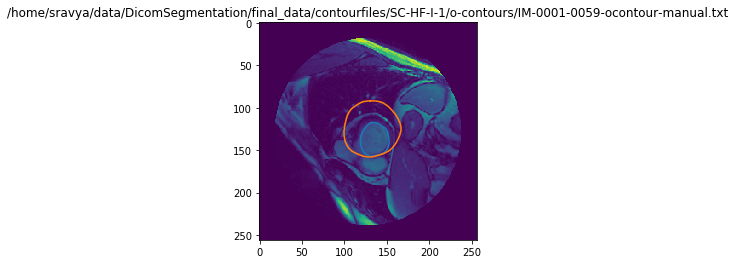

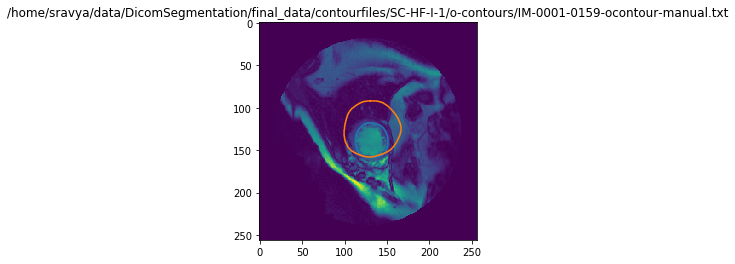

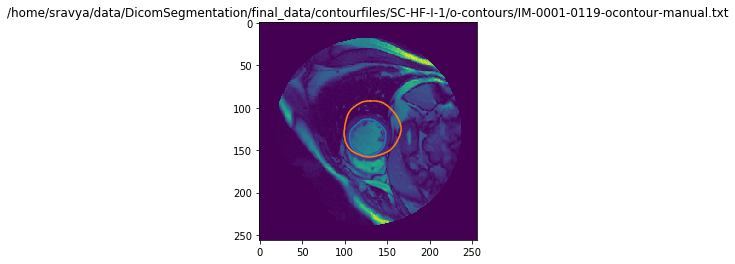

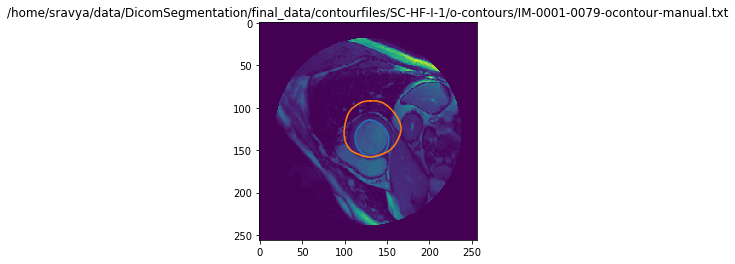

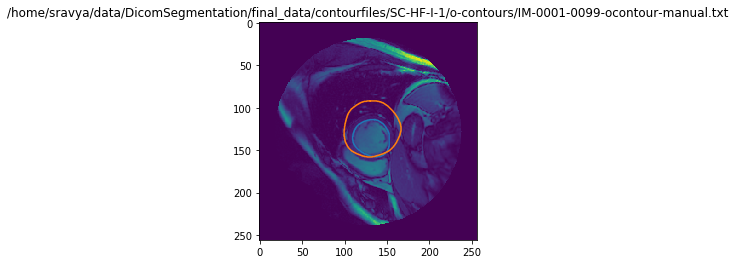

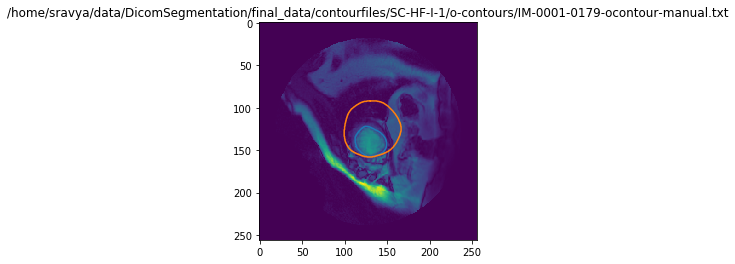

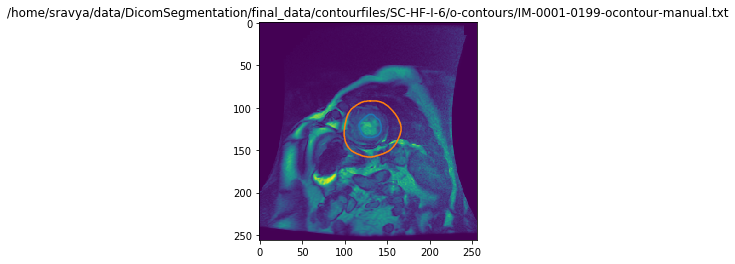

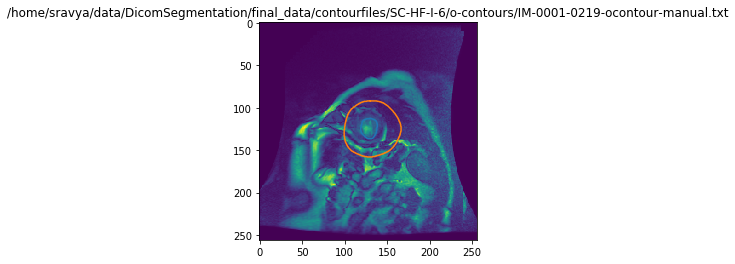

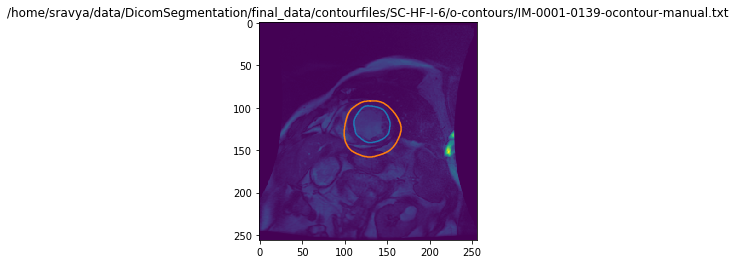

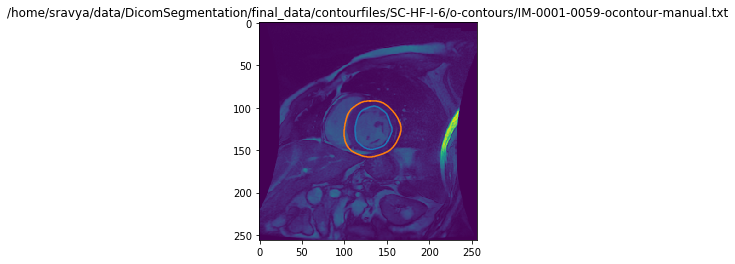

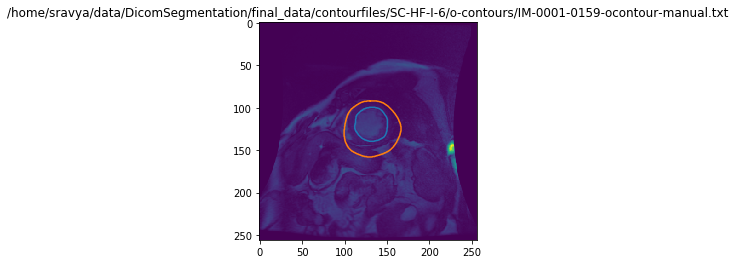

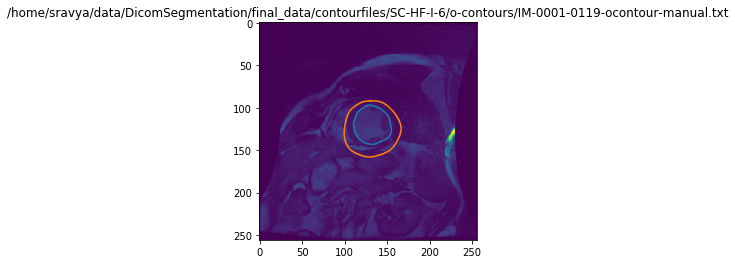

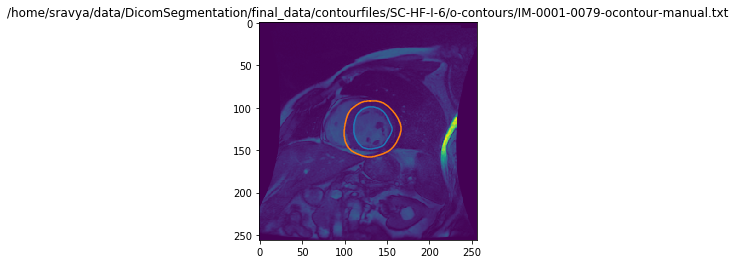

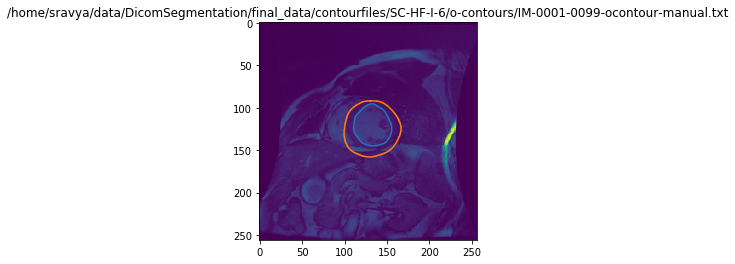

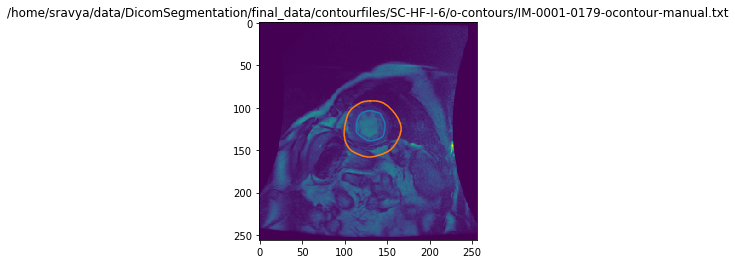

In [589]:
#Visualize overlayes for a few random icontour files for a visual sanity check
for file in ocfiles:
    dicom_arr, imask, ipolygon, omask, oplygon = du.get_dicom_and_mask(file)
    du.visualize_overlay(file, dicom_arr, [ipolygon, opolygon])

In [590]:
len(ocfiles)

46

# Explore sizes of the data

In [591]:
dicom_sizes = []
for file in ocfiles:
    dicom_arr, _,_,_,_ = du.get_dicom_and_mask(file)
    dicom_sizes.append(dicom_arr.shape)

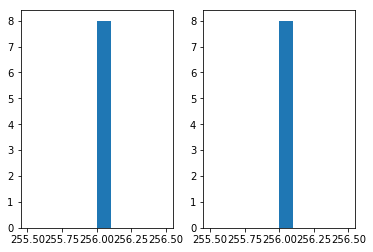

In [593]:
x = [size[0] for size in dicom_sizes]
y = [size[1] for size in dicom_sizes]
f, axarr = plt.subplots(1, 2)
axarr[0].hist(x)
axarr[1].hist(y)
plt.show()

In [ ]:
#So all the dicoms are of shape (256,256)

# Use Data Generator

In [598]:
gen = du.data_generator(8)
try:
    while(1):
        dicoms,imasks,omasks = next(gen)
        print(dicoms.shape, imasks.shape, omasks.shape)
except StopIteration:
    pass
gen.close()

Starting data generator
(2048, 256) (2048, 256) (2048, 256)
(2048, 256) (2048, 256) (2048, 256)
(2048, 256) (2048, 256) (2048, 256)
(2048, 256) (2048, 256) (2048, 256)
(2048, 256) (2048, 256) (2048, 256)


In [ ]:
# Sanity check - Check if i-countour is inside o-contour completely
# Approach 1: 
#   Is each index in i-contour inside o-contour: See point in polygon strategies here: http://alienryderflex.com/polygon/
#   If there are concave parts of the o-contour, We might also have to additionally make sure there are no edge intersections between i-contour and o-contour
#   https://gamedev.stackexchange.com/questions/30534/how-do-i-determine-if-one-polygon-completely-contains-another
# Approach 2:
#   Get bounding box of o-contour, and overlayed masks of i-contour and o-contour
#   visit all columns making sure all icontour masks appear inside a pair of o-contour pixels

In [ ]:
# Do all o-counters have associated dicoms and i-contours?

## SC-HF-I-6 patient o-contours do not seem right, dig deeper

In [599]:
# Dig deeper into SC-HF-I-6 o-contours
orig_id = 'SC-HF-I-6'
cregex = CONTOUR_PATH + orig_id + '/o-*/*'
cfiles = glob.glob(cregex)
cfiles

['/home/sravya/data/DicomSegmentation/final_data/contourfiles/SC-HF-I-6/o-contours/IM-0001-0199-ocontour-manual.txt',
 '/home/sravya/data/DicomSegmentation/final_data/contourfiles/SC-HF-I-6/o-contours/IM-0001-0219-ocontour-manual.txt',
 '/home/sravya/data/DicomSegmentation/final_data/contourfiles/SC-HF-I-6/o-contours/IM-0001-0139-ocontour-manual.txt',
 '/home/sravya/data/DicomSegmentation/final_data/contourfiles/SC-HF-I-6/o-contours/IM-0001-0059-ocontour-manual.txt',
 '/home/sravya/data/DicomSegmentation/final_data/contourfiles/SC-HF-I-6/o-contours/IM-0001-0159-ocontour-manual.txt',
 '/home/sravya/data/DicomSegmentation/final_data/contourfiles/SC-HF-I-6/o-contours/IM-0001-0119-ocontour-manual.txt',
 '/home/sravya/data/DicomSegmentation/final_data/contourfiles/SC-HF-I-6/o-contours/IM-0001-0079-ocontour-manual.txt',
 '/home/sravya/data/DicomSegmentation/final_data/contourfiles/SC-HF-I-6/o-contours/IM-0001-0099-ocontour-manual.txt',
 '/home/sravya/data/DicomSegmentation/final_data/contour

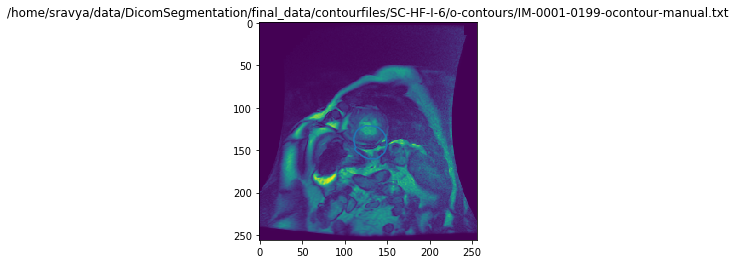

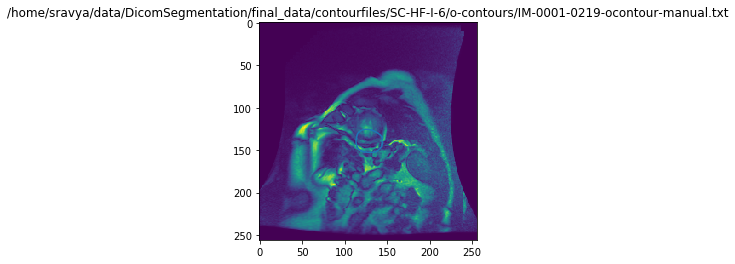

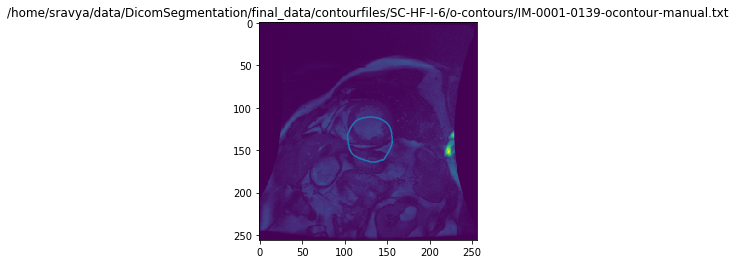

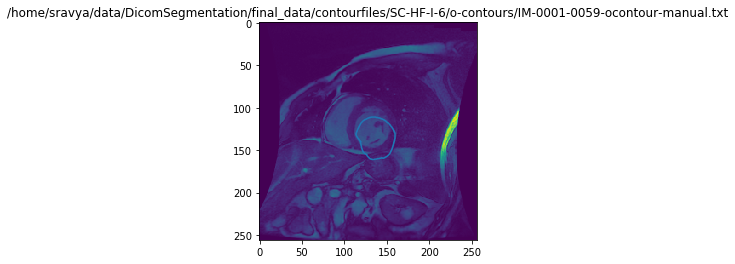

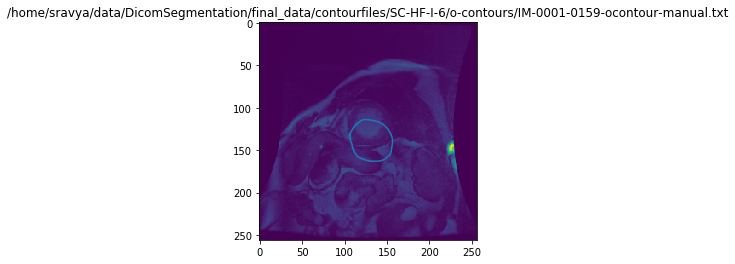

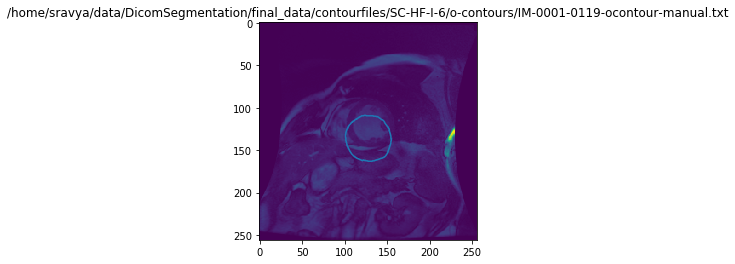

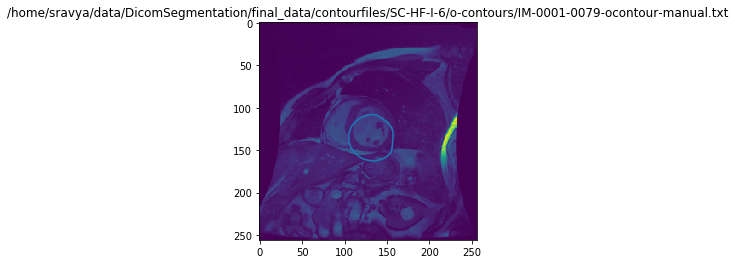

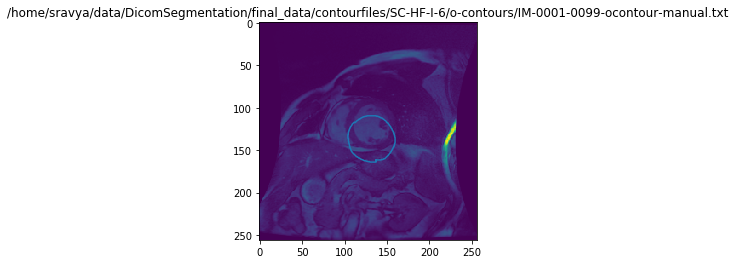

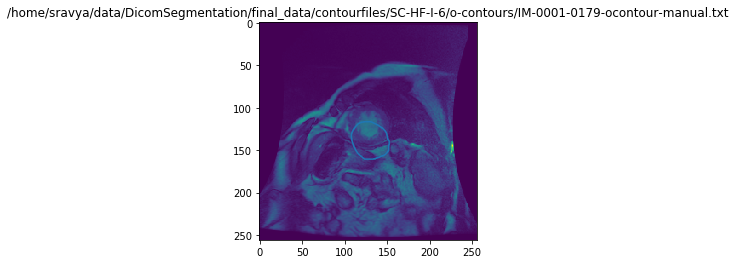

In [601]:
#Visualize overlayes for a few random o-contour files for a visual sanity check
for file in cfiles:
    dicom_arr, _,_,mask, polygon = du.get_dicom_and_mask(file)
    du.visualize_overlay(file, dicom_arr, [polygon])

In [ ]:
#Note: All of them seem a little offset on y-axis

In [602]:
# Dig deeper into SC-HF-I-6 i-contours
orig_id = 'SC-HF-I-6'
cregex = CONTOUR_PATH + orig_id + '/i-*/*'
cfiles = glob.glob(cregex)
cfiles

['/home/sravya/data/DicomSegmentation/final_data/contourfiles/SC-HF-I-6/i-contours/IM-0001-0159-icontour-manual.txt',
 '/home/sravya/data/DicomSegmentation/final_data/contourfiles/SC-HF-I-6/i-contours/IM-0001-0009-icontour-manual.txt',
 '/home/sravya/data/DicomSegmentation/final_data/contourfiles/SC-HF-I-6/i-contours/IM-0001-0059-icontour-manual.txt',
 '/home/sravya/data/DicomSegmentation/final_data/contourfiles/SC-HF-I-6/i-contours/IM-0001-0139-icontour-manual.txt',
 '/home/sravya/data/DicomSegmentation/final_data/contourfiles/SC-HF-I-6/i-contours/IM-0001-0189-icontour-manual.txt',
 '/home/sravya/data/DicomSegmentation/final_data/contourfiles/SC-HF-I-6/i-contours/IM-0001-0039-icontour-manual.txt',
 '/home/sravya/data/DicomSegmentation/final_data/contourfiles/SC-HF-I-6/i-contours/IM-0001-0089-icontour-manual.txt',
 '/home/sravya/data/DicomSegmentation/final_data/contourfiles/SC-HF-I-6/i-contours/IM-0001-0149-icontour-manual.txt',
 '/home/sravya/data/DicomSegmentation/final_data/contour

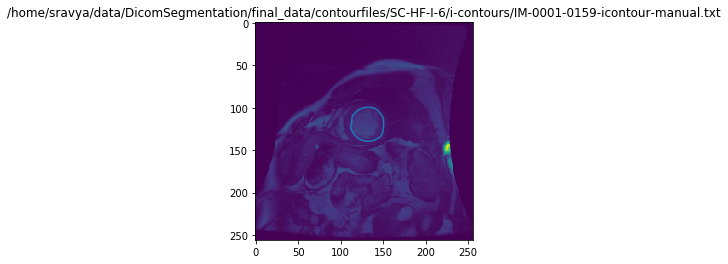

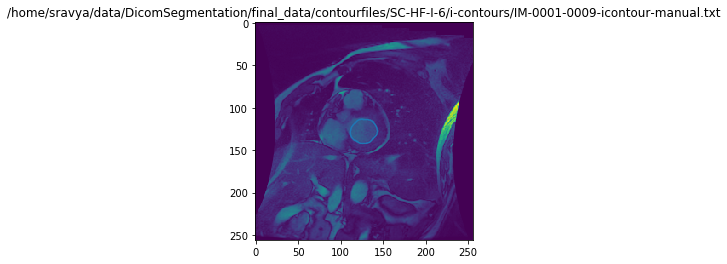

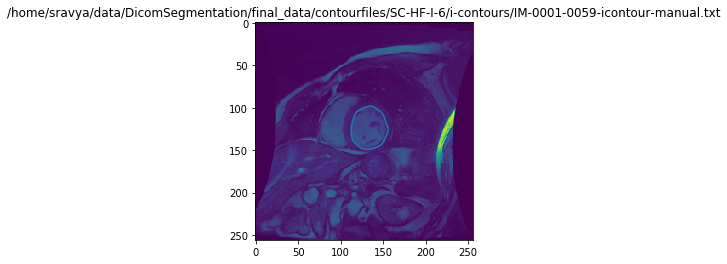

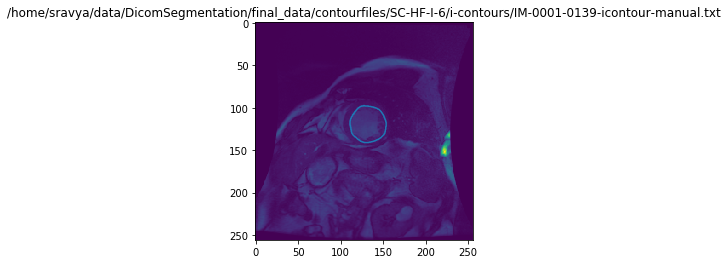

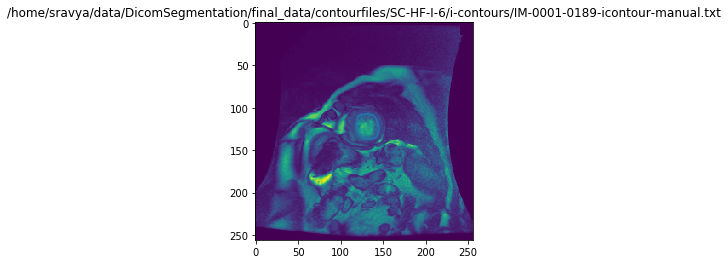

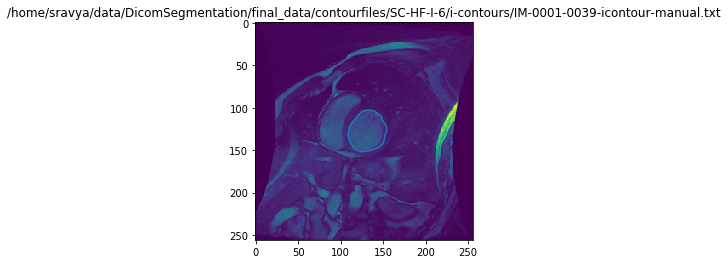

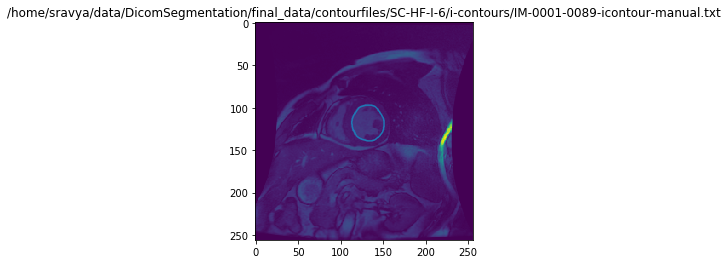

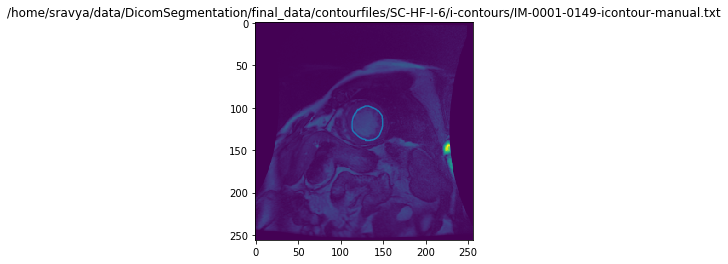

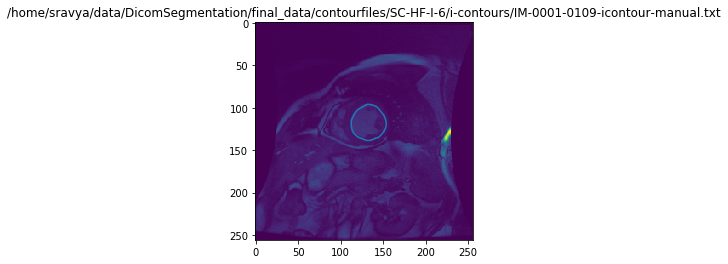

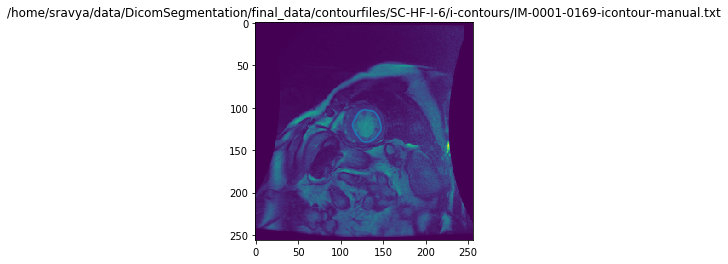

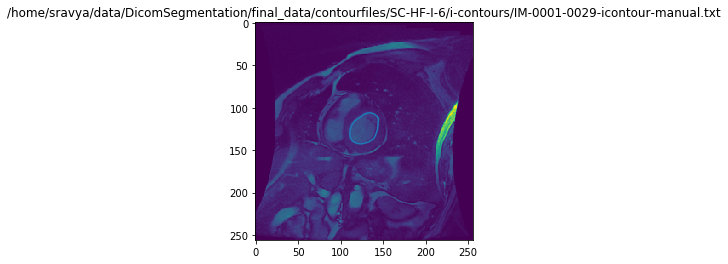

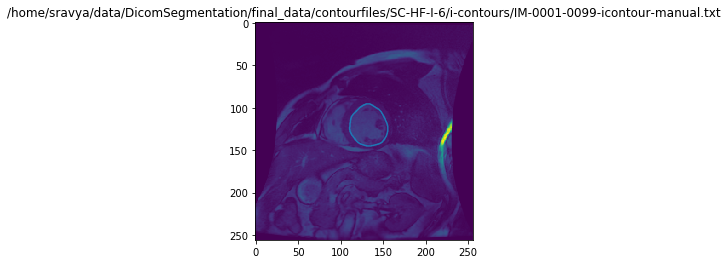

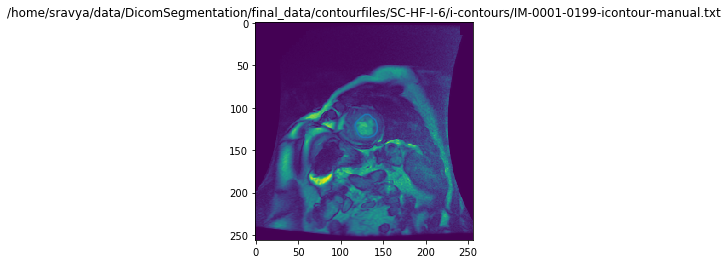

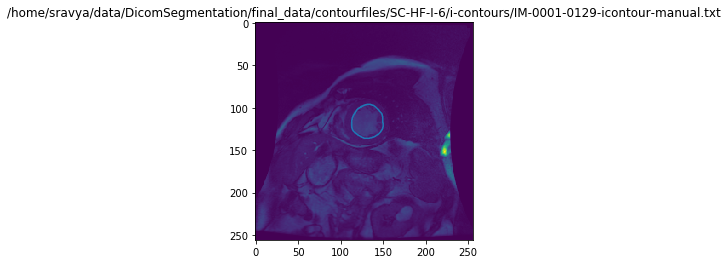

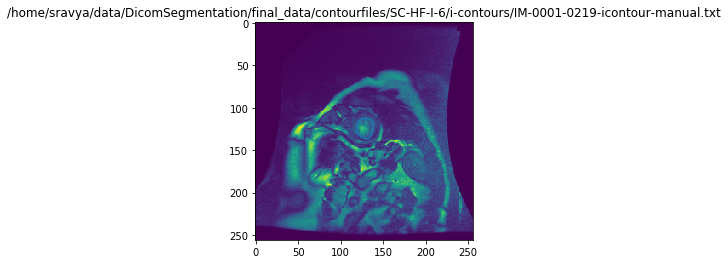

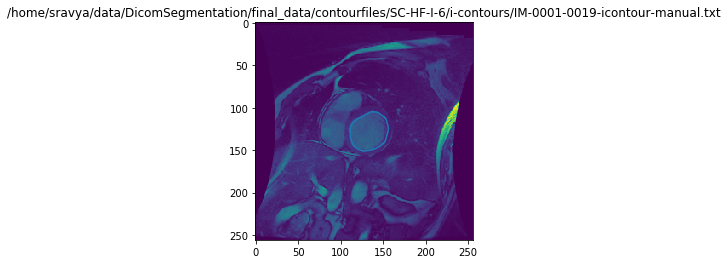

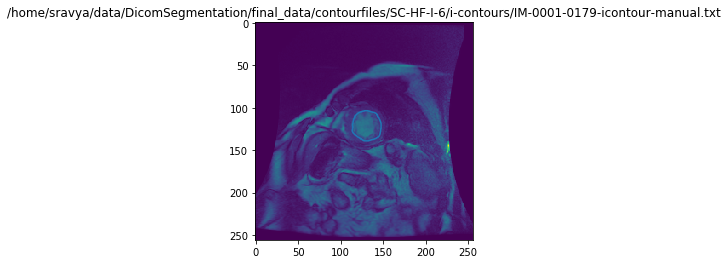

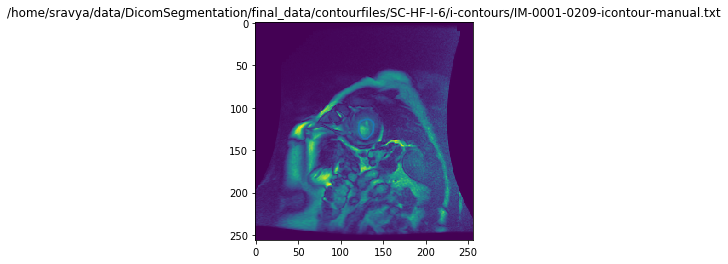

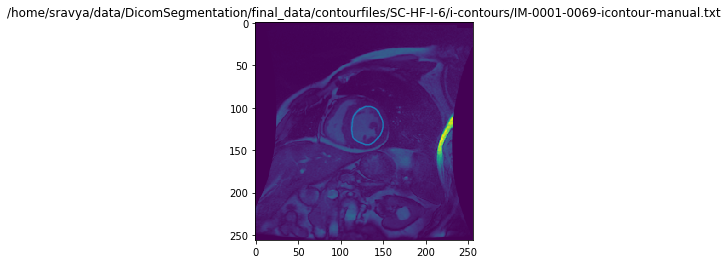

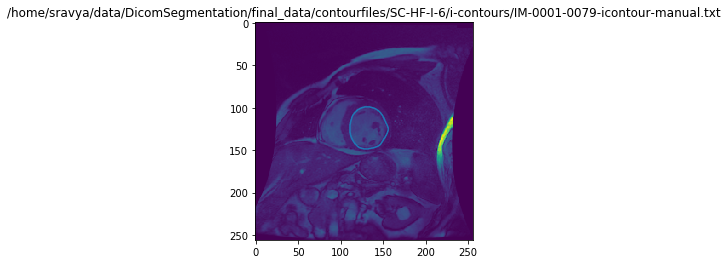

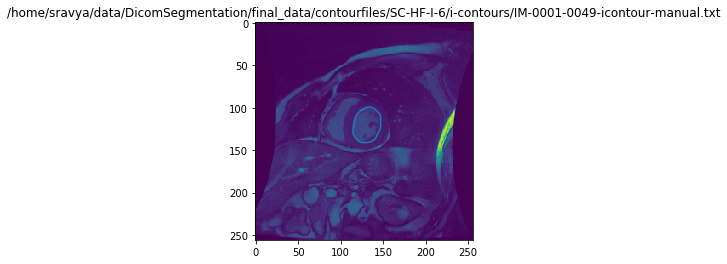

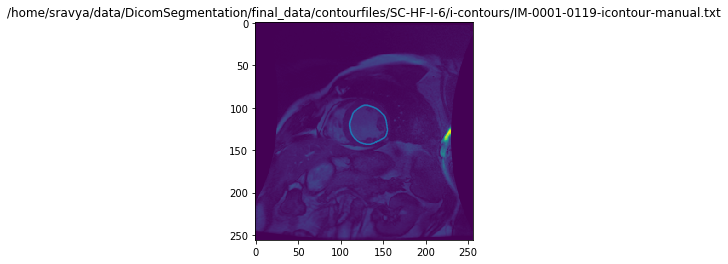

In [604]:
#Visualize overlayes for a few random i-contour files for a visual sanity check
for file in cfiles:
    dicom_arr, mask, polygon,_,_ = du.get_dicom_and_mask(file)
    du.visualize_overlay(file, dicom_arr, [polygon])

#Note: i-contours look fine

# Phase 2 task 2

In [605]:
ocfiles = [ocfile for ocfile in ocfiles if 'SC-HF-I-6' not in ocfile] #Remove incorrectly labelled o-contour files
ocfiles

['/home/sravya/data/DicomSegmentation/final_data/contourfiles/SC-HF-I-1/o-contours/IM-0001-0079-ocontour-manual.txt',
 '/home/sravya/data/DicomSegmentation/final_data/contourfiles/SC-HF-I-1/o-contours/IM-0001-0159-ocontour-manual.txt',
 '/home/sravya/data/DicomSegmentation/final_data/contourfiles/SC-HF-I-2/o-contours/IM-0001-0160-ocontour-manual.txt',
 '/home/sravya/data/DicomSegmentation/final_data/contourfiles/SC-HF-I-5/o-contours/IM-0001-0140-ocontour-manual.txt',
 '/home/sravya/data/DicomSegmentation/final_data/contourfiles/SC-HF-I-4/o-contours/IM-0001-0040-ocontour-manual.txt',
 '/home/sravya/data/DicomSegmentation/final_data/contourfiles/SC-HF-I-1/o-contours/IM-0001-0199-ocontour-manual.txt',
 '/home/sravya/data/DicomSegmentation/final_data/contourfiles/SC-HF-I-1/o-contours/IM-0001-0119-ocontour-manual.txt',
 '/home/sravya/data/DicomSegmentation/final_data/contourfiles/SC-HF-I-2/o-contours/IM-0001-0200-ocontour-manual.txt']

## Analyze intensities for one example

In [608]:
#Utilities to mask everything else except region of interest
import numpy.ma as ma

def get_bb(mask):
    xmin =256
    xmax =0
    ymin=256
    ymax =0    
    for row in range(len(mask)):
        if any(mask[row]):
            xmin = row
            break
    for row in reversed(range(len(mask))):
        if any(mask[row]):
            xmax = row
            break
    for column in range(len(mask[0])):
        if any(mask[:,column]):
            ymin = column
            break
    for column in reversed(range(len(mask[0]))):
        if any(mask[:,column]):
            ymax = column
            break
    return xmin,xmax,ymin,ymax

def getThreshold(freq):
    return 160

def analyze(ocfile):
    dicom_arr, imask, ipolygon, omask, opolygon = du.get_dicom_and_mask(ocfile)
    
    xmin,xmax,ymin,ymax = get_bb(omask)
    omask = omask[xmin:xmax+1,ymin:ymax+1]
    imask = imask[xmin:xmax+1,ymin:ymax+1]
    blood_muscle_dicom = dicom_arr[xmin:xmax+1,ymin:ymax+1]
    
    #blood_muscle = mask_bg(blood_muscle_dicom,)
    blood_muscle = ma.masked_array(blood_muscle_dicom, ~omask)
    blood_muscle = ma.filled(blood_muscle, fill_value=0)
    
    blood = ma.masked_array(blood_muscle, ~imask)
    blood = ma.filled(blood, fill_value=0)
    
    muscle = ma.masked_array(blood_muscle, imask)
    muscle = ma.filled(muscle, fill_value=0)
    plt.clf()
    f, axarr = plt.subplots(2, 3)
    axarr[0,0].imshow(blood)
    axarr[0,0].set_title("Blood")
    
    axarr[0,1].imshow(muscle)
    axarr[0,1].set_title("Muscle")
    
    blood_freq = blood.ravel()[blood.ravel()>0]
    muscle_freq = muscle.ravel()[muscle.ravel()>0]
    blood_muscle_freq = blood_muscle.ravel()[blood_muscle.ravel()>0]
    
    axarr[1,0].hist(blood_freq, alpha=0.7), axarr[1,0].hist(muscle_freq, alpha=0.7)
    axarr[1,0].set_title("Blood, Muscle")
    
    axarr[1,1].hist(blood_muscle_freq, alpha=0.7)
    axarr[1,1].set_title("Blood+Muscle")
    
    axarr[1,2].hist(abs(blood.ravel()-muscle.ravel()), alpha=0.7)
    axarr[1,2].set_title("Blood-Muscle")
    
    threshold = getThreshold(blood_muscle_freq)
    axarr[0,2].imshow(upper_bound(blood_muscle,threshold))
    axarr[0,2].set_title("Thresholded at {}".format(threshold))
    plt.tight_layout()
    plt.show()
    
def upper_bound(dicom, threshold):
    bounded = np.empty((dicom.shape))
    for row in range(len(dicom)):
        for column in range(len(dicom[0])):
            if dicom[row,column]>threshold:
                bounded[row,column] = 0
            else:
                bounded[row,column] = dicom[row,column]
    return bounded           

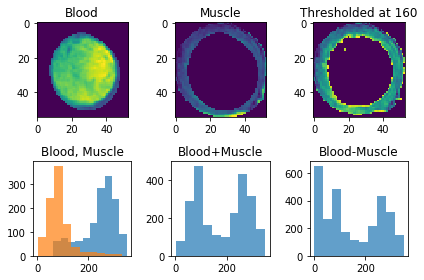

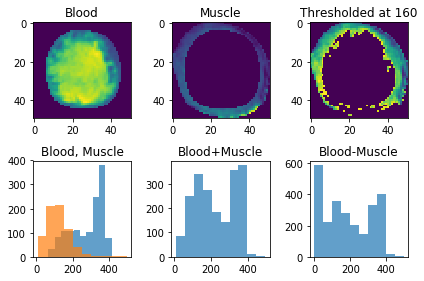

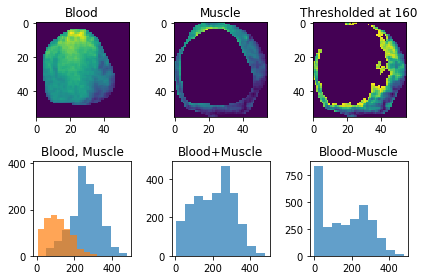

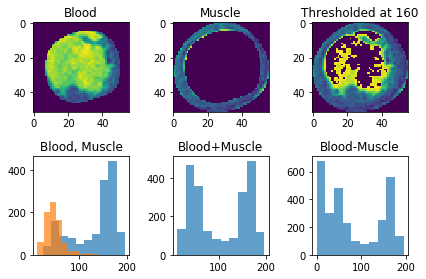

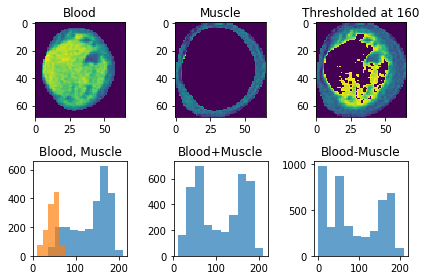

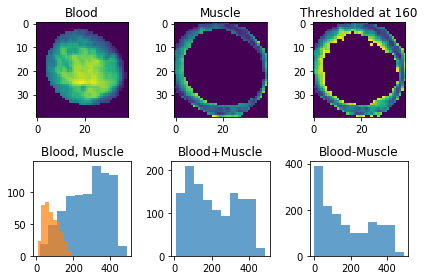

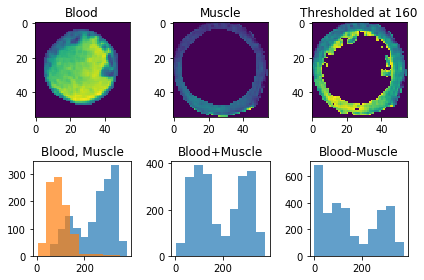

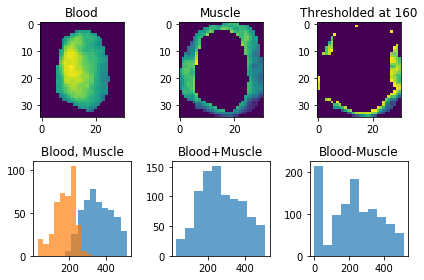

In [610]:
for ocfile in ocfiles:
    analyze(ocfile)